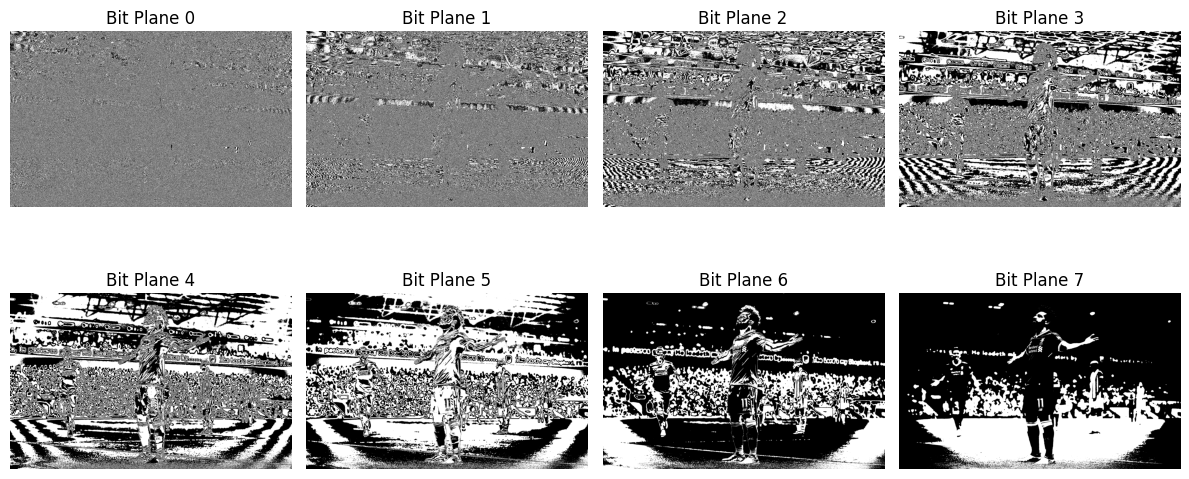

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load grayscale image
image_path = os.path.join("../images", "salah.jpg")


gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get image dimensions
rows, cols = gray_image.shape

# Extract 8 bit-planes
bit_planes = []
for i in range(8):
    bit_plane = (gray_image >> i) & 1  # Extract i-th bit
    bit_planes.append(bit_plane * 255)  # Scale to 0-255

# Plot 8-bit planes
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()  # Flatten the 2D array of axes into 1D

for i in range(8):
    axes[i].imshow(bit_planes[i], cmap='gray')
    axes[i].set_title(f"Bit Plane {i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# **Gray Level Slicing (Without Background)**
min_gray, max_gray = 100, 180
sliced_image_no_bg = np.where((gray_image >= min_gray) & (gray_image <= max_gray), 255, 0)

# **Gray Level Slicing (With Background)**
sliced_image_with_bg = gray_image.copy().astype(np.uint8)
sliced_image_with_bg[(gray_image >= min_gray) & (gray_image <= max_gray)] = 255

# Plot the sliced images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Without background
axes[0].imshow(sliced_image_no_bg, cmap="gray")
axes[0].set_title("Gray Level Slicing (No Background)")
axes[0].axis("off")

# With background
axes[1].imshow(sliced_image_with_bg, cmap="gray")
axes[1].set_title("Gray Level Slicing (With Background)")
axes[1].axis("off")

plt.tight_layout()
plt.show()
